In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
input_dir = r'/Users/sinsakuokazaki/Document'
tips = sns.load_dataset('tips')
output_file = os.path.join(input_dir,'tips.csv')
tips['percent_tip'] = 100.0 * tips['tip'] / tips['total_bill']

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [4]:
#1.Are tips higher for lunch or dinner?
tips_for_time = tips.groupby('time')['tip'].mean()
for i in tips_for_time.index:
    print(i, ':', tips_for_time[i])
#Average of tips for dinner is higher than lunch

Lunch : 2.7280882352941176
Dinner : 3.102670454545454


In [5]:
#2.When are tips highest (which day and time)? 
tips_for_day_and_time = tips.groupby(['day', 'time'])['tip'].mean()
for i in tips_for_day_and_time.index:
    print(i[0], i[1], ':', tips_for_day_and_time[i])
#The highest average tips according to dyas and times is the dinner on Sunday

Thur Lunch : 2.7677049180327873
Thur Dinner : 3.0
Fri Lunch : 2.382857142857143
Fri Dinner : 2.94
Sat Dinner : 2.993103448275862
Sun Dinner : 3.255131578947369


Text(0,0.5,'Percent of tip')

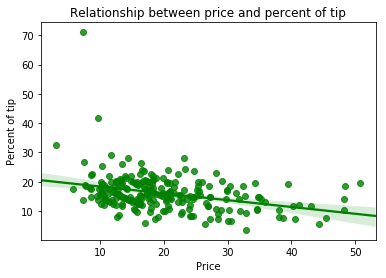

In [6]:
#3.Is there any relationship between price and tipping percentage?
price = tips['total_bill'].values
percent_tip = tips['percent_tip'].values

scatter, ax = plt.subplots()
ax = sns.regplot(x= 'total_bill', y='percent_tip',
                 data=tips, color='green')
ax.set_title('Relationship between price and percent of tip')
ax.set_xlabel('Price')
ax.set_ylabel('Percent of tip')

In [7]:
#The correlation efficient is around negative 3.4, 
#so there seems moderate negative linear relationship of percent of tips when total price is given
np.corrcoef(price, percent_tip)

array([[ 1.        , -0.33862408],
       [-0.33862408,  1.        ]])

Text(0,0.5,'Percent of Tips')

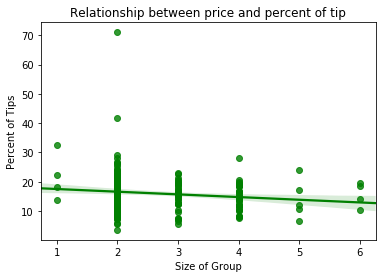

In [8]:
#4.	Any relationship between tip (as a percentage) and size of the group
size = tips['size'].values

scatter, ax = plt.subplots()
ax = sns.regplot(x= 'size', y='percent_tip',
                 data=tips, color='green')
ax.set_title('Relationship between price and percent of tip')
ax.set_xlabel('Size of Group')
ax.set_ylabel('Percent of Tips')

In [9]:
#The correlation efficient is around negative 0.14,
#so there seems alomost no relationship between size of group and percent of tips.
np.corrcoef(size, percent_tip)

array([[ 1.       , -0.1428596],
       [-0.1428596,  1.       ]])

In [10]:
#5.	What percentage of people are smoking?
size_values = tips['size'].value_counts()

number_of_customer = 0
for size, number in zip(size_values.index, size_values):
    number_of_customer += size * number

size_smoker = tips.loc[tips['smoker'] == 'Yes']['size'].value_counts()

number_of_smoker = 0
for size, number in zip(size_smoker.index, size_values):
    number_of_smoker += size * number

percent_smoker = 100.0 * number_of_smoker / number_of_customer

#percent of smoker is
print(percent_smoker)

96.17224880382776


Text(0,0.5,'Tip')

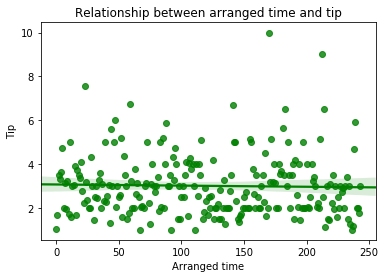

In [11]:
#6.	Assume that rows are arranged in time
#Are tips increasing with time?
arranged_time = np.array(list(tips.index))
tip = tips['tip'].values

scatter, ax = plt.subplots()
ax = sns.regplot(x= arranged_time, y=tip,
                color='green')
ax.set_title('Relationship between arranged time and tip')
ax.set_xlabel('Arranged time')
ax.set_ylabel('Tip')

In [12]:
np.corrcoef(arranged_time, tip)
#The correlation coefficient is negative 0.027,
#so there is almost no realationship between arranged time and amount of tips
#However, it can be seen that amount of tip relatively decreases with time

array([[ 1.        , -0.02670894],
       [-0.02670894,  1.        ]])

In [24]:
#7.
tips_for_gender = tips.groupby('sex')['tip'].mean()

In [31]:
data = pd.DataFrame(tips_for_gender)

Text(0,0.5,'tips')

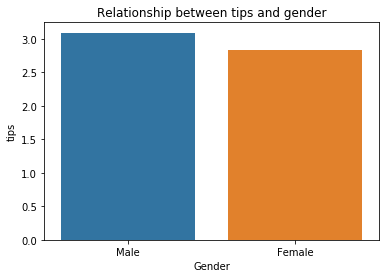

In [34]:
scatter, ax = plt.subplots()
ax = sns.barplot(data.index, data['tip'])
ax.set_title('Relationship between tips and gender')
ax.set_xlabel('Gender')
ax.set_ylabel('tips')

In [35]:
tips_for_time = tips.groupby('time')['tip'].mean()

In [36]:
data = pd.DataFrame(tips_for_time)

Text(0,0.5,'tips')

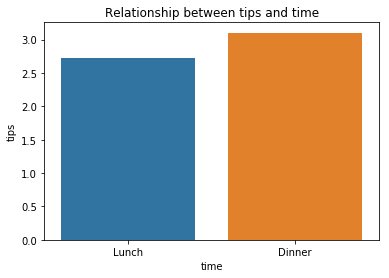

In [37]:
scatter, ax = plt.subplots()
ax = sns.barplot(data.index, data['tip'])
ax.set_title('Relationship between tips and time')
ax.set_xlabel('time')
ax.set_ylabel('tips')

In [40]:
#8.Correlation between tip amounts from smokers and non-smokers
size_of_smoker = tips.loc[tips['smoker'] == 'Yes']['size'].values
size_of_nonsmoker = tips.loc[tips['smoker'] == 'No']['size'].values
tip_of_smoker = tips.loc[tips['smoker'] == 'Yes']['tip'].values
tip_of_nonsmoker = tips.loc[tips['smoker'] == 'No']['tip'].values

Text(0,0.5,'Amount of Tip')

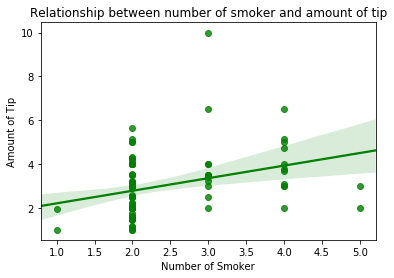

In [41]:
scatter, ax = plt.subplots()
ax = sns.regplot(x= size_of_smoker, y=tip_of_smoker,
                color='green')
ax.set_title('Relationship between number of smoker and amount of tip')
ax.set_xlabel('Number of Smoker')
ax.set_ylabel('Amount of Tip')

In [42]:
np.corrcoef(size_of_smoker, tip_of_smoker)
#The correlation coefficient is positive 0.3322,
#so there is moderate realationship between number of smoker and and amount of tips

array([[1.       , 0.3322267],
       [0.3322267, 1.       ]])

Text(0,0.5,'Amount of Tip')

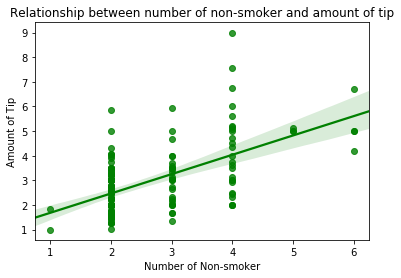

In [43]:
scatter, ax = plt.subplots()
ax = sns.regplot(x= size_of_nonsmoker, y=tip_of_nonsmoker,
                color='green')
ax.set_title('Relationship between number of non-smoker and amount of tip')
ax.set_xlabel('Number of Non-smoker')
ax.set_ylabel('Amount of Tip')

In [44]:
np.corrcoef(size_of_nonsmoker, tip_of_nonsmoker)
#The correlation coefficient is positive 0.5801,
#so there is relatively strong realationship between number of non-smoker and and amount of tips

array([[1.       , 0.5801066],
       [0.5801066, 1.       ]])

In [23]:
#9.	Average tip for each day of the week
ave_tip_for_weekday = tips.groupby('day')['tip'].mean()
for i in ave_tip_for_weekday.index:
    print(i,':', ave_tip_for_weekday[i])

Thur : 2.771451612903226
Fri : 2.734736842105263
Sat : 2.993103448275862
Sun : 3.255131578947369


In [24]:
#10.Which gender smokes more?
smoker_gender = tips.loc[tips['smoker'] == 'Yes'].groupby('sex')['size'].aggregate('sum')
size_gender = tips.groupby('sex')['size'].aggregate('sum')
ration_of_smoker_by_gender = smoker_gender / size_gender
for i in ration_of_smoker_by_gender.index:
    print(i, ':', ration_of_smoker_by_gender[i])
#Male smokes more than Female

Male : 0.36319612590799033
Female : 0.34579439252336447
